In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
# Define column names (44 columns, including 'attack_type' and 'difficulty_level')
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]


In [22]:
train_data = pd.read_csv('archive/KDDTrain+.txt')
test_data = pd.read_csv('archive/KDDTest+.csv')

In [24]:
# Drop the 'Unnamed: 0' column from test_data if it exists
if 'Unnamed: 0' in test_data.columns:
    test_data = test_data.drop('Unnamed: 0', axis=1)

# Define column names based on KDD Cup 1999 dataset features
column_names = [
  'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
  'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
  'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
  'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
  'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
  'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
  'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
  'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'
]

# Rename columns for both dataframes
train_data.columns = column_names
test_data.columns = column_names

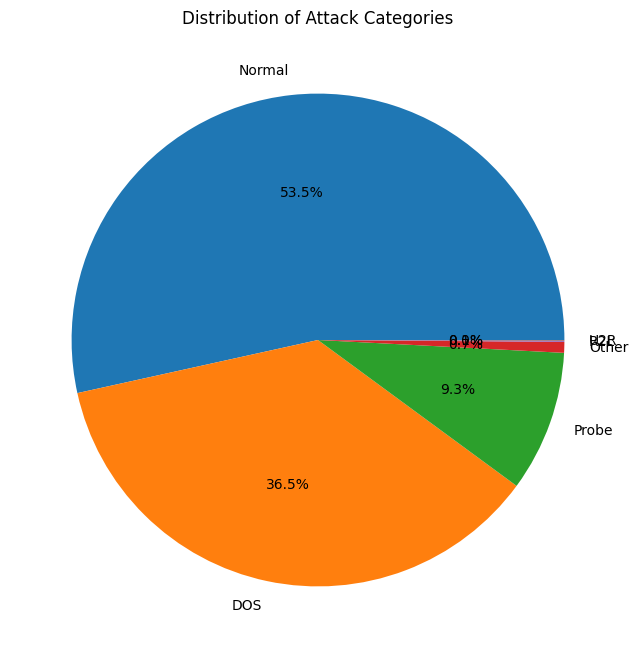

In [25]:
# Create attack categories
attack_categories = {
  'DOS': ['neptune', 'back', 'smurf', 'pod', 'teardrop', 'land', 'apache2', 'udpstorm', 'processtable', 'mailbomb'],
  'Probe': ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
  'R2L': ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'xsnoop', 'httptunnel', 'snmpguess', 'snmpgetattack', 'sendmail'],
  'U2R': ['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps'],
  'Normal': ['normal']
}

# Function to map attack types to categories
def get_attack_category(attack):
  for category, attacks in attack_categories.items():
    if attack in attacks:
      return category
  return 'Other'

# Create category counts
train_data['attack_category'] = train_data['attack_type'].apply(get_attack_category)
category_counts = train_data['attack_category'].value_counts()
test_data['attack_category'] = test_data['attack_type'].apply(get_attack_category)
test_category_counts = test_data['attack_category'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Attack Categories')
plt.show()